In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [38]:
salaires = '/content/drive/MyDrive/Kaggle/ds_salaries.csv'

In [63]:
data = pd.read_csv(salaires)

In [40]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [41]:
data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [42]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [43]:
# !pip install skimpy
from skimpy import skim

In [44]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3755   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 11     │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name       ┃ NA  ┃ NA %   ┃ mean     ┃ sd       ┃ p0     ┃ p25      ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ work_year         │   0 │      0 │     2000 │     0.69 │   2000 │     2000 │    2000 │       2000 │   ▁ ▇█ │  │
│ │ salary            │   0 │      0 │   190000 │   670000 │   6000 │   100000 │  180000 │   30000000 │   █    │  │
│ │ salary_in_usd     │   0 │      0 │   140000 │    63000 │   5100 │    95000 │  180000 │     450000 │  ▃█▅▁  │  │
│ │ remote_ratio      │   0 │      0 │       46 │       49 │      0 │        0 │     100 │        100 │ █  ▁ ▇ │  │
│ └───────────────────┴─────┴────────┴──────────┴──────────┴────────┴──────────┴─────────┴────────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ experience_level                   │      0 │         0 │                         1 │                 3800 │  │
│ │ employment_type                    │      0 │         0 │                         1 │                 3800 │  │
│ │ job_title                          │      0 │         0 │                         1 │                 3800 │  │
│ │ salary_currency                    │      0 │         0 │                         1 │                 3800 │  │
│ │ employee_residence                 │      0 │         0 │                         1 │                 3800 │  │
│ │ company_location                   │      0 │         0 │                         1 │                 3800 │  │
│ │ company_size                       │      0 │         0 │                         1 │                 3800 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [45]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [64]:
data.drop('salary', axis = 1, inplace=True)
data.drop('salary_currency', axis = 1, inplace=True)

In [47]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [48]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3755   │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 9      │ │ int64       │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25     ┃ p75      ┃ p100     ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ work_year          │    0 │      0 │     2000 │    0.69 │   2000 │    2000 │     2000 │     2000 │   ▁ ▇█  │  │
│ │ salary_in_usd      │    0 │      0 │   140000 │   63000 │   5100 │   95000 │   180000 │   450000 │  ▃█▅▁   │  │
│ │ remote_ratio       │    0 │      0 │       46 │      49 │      0 │       0 │      100 │      100 │ █  ▁ ▇  │  │
│ └────────────────────┴──────┴────────┴──────────┴─────────┴────────┴─────────┴──────────┴──────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ experience_level                   │      0 │         0 │                         1 │                 3800 │  │
│ │ employment_type                    │      0 │         0 │                         1 │                 3800 │  │
│ │ job_title                          │      0 │         0 │                         1 │                 3800 │  │
│ │ employee_residence                 │      0 │         0 │                         1 │                 3800 │  │
│ │ company_location                   │      0 │         0 │                         1 │                 3800 │  │
│ │ company_size                       │      0 │         0 │                         1 │                 3800 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [49]:
numericals = data.select_dtypes(include=np.number)
numericals

,work_year,salary_in_usd,remote_ratio
0,2023,85847,100
1,2023,30000,100
2,2023,25500,100
3,2023,175000,100
4,2023,120000,100
...,...,...,...
3750,2020,412000,100
3751,2021,151000,100
3752,2020,105000,100
3753,2020,100000,100


<Axes: >

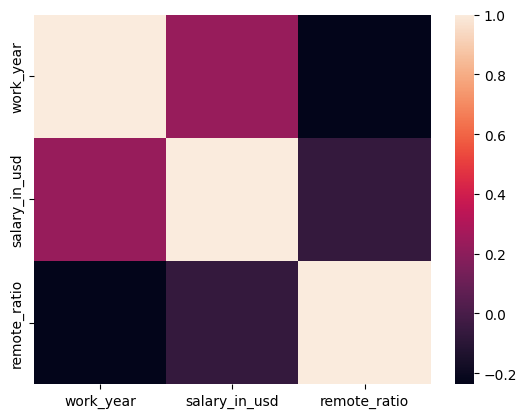

In [50]:
sns.heatmap(numericals.corr())

<BarContainer object of 2 artists>

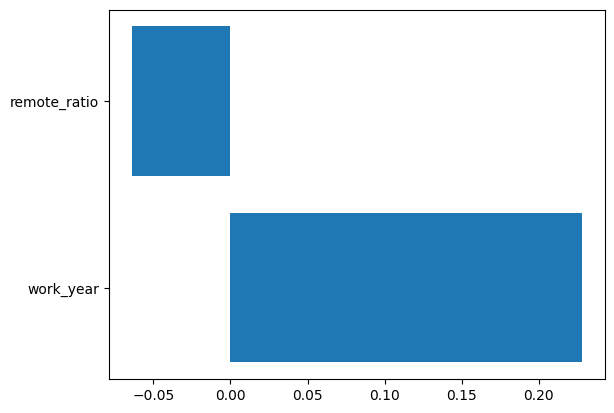

In [51]:
corr = numericals.drop('salary_in_usd', axis=1).corrwith(numericals['salary_in_usd'])
plt.barh(corr.index, corr.values)

In [52]:
data['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [53]:
categoricals = data.select_dtypes(include = ['object'])

In [54]:
categoricals

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
0,SE,FT,Principal Data Scientist,ES,ES,L
1,MI,CT,ML Engineer,US,US,S
2,MI,CT,ML Engineer,US,US,S
3,SE,FT,Data Scientist,CA,CA,M
4,SE,FT,Data Scientist,CA,CA,M
...,...,...,...,...,...,...
3750,SE,FT,Data Scientist,US,US,L
3751,MI,FT,Principal Data Scientist,US,US,L
3752,EN,FT,Data Scientist,US,US,S
3753,EN,CT,Business Data Analyst,US,US,L


In [55]:
# !pip install dython

In [56]:
from dython.nominal import associations

In [57]:
categoricals.columns

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')

In [58]:
categoricals_columns = categoricals.columns.tolist()

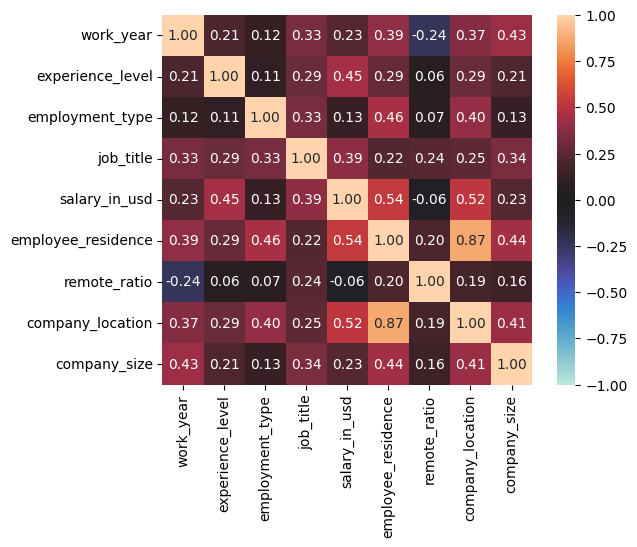

In [59]:
corr_matrix = associations(data, nominal_columns=categoricals_columns)

In [66]:
#0.87 company_location et employee_residence
data.drop('employee_residence', axis=1, inplace=True)

In [68]:
categoricals.drop('employee_residence', axis = 1, inplace=True)

In [69]:
data['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

In [70]:
maping = {
    'S':1,
    'M':2,
    'L':3
}
data['company_size'] = data['company_size'].map(maping)

In [75]:
data['company_size'].dtype

dtype('int64')

In [76]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,100,ES,3
1,2023,MI,CT,ML Engineer,30000,100,US,1
2,2023,MI,CT,ML Engineer,25500,100,US,1
3,2023,SE,FT,Data Scientist,175000,100,CA,2
4,2023,SE,FT,Data Scientist,120000,100,CA,2
...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,100,US,3
3751,2021,MI,FT,Principal Data Scientist,151000,100,US,3
3752,2020,EN,FT,Data Scientist,105000,100,US,1
3753,2020,EN,CT,Business Data Analyst,100000,100,US,3


In [79]:
data['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [80]:
maping2 = {
    'EN' : 1,
    'MI' : 2,
    'SE' : 3,
    'EX' : 4
}
data['experience_level'] = data['experience_level'].map(maping2)


In [81]:
data

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2023,3,FT,Principal Data Scientist,85847,100,ES,3
1,2023,2,CT,ML Engineer,30000,100,US,1
2,2023,2,CT,ML Engineer,25500,100,US,1
3,2023,3,FT,Data Scientist,175000,100,CA,2
4,2023,3,FT,Data Scientist,120000,100,CA,2
...,...,...,...,...,...,...,...,...
3750,2020,3,FT,Data Scientist,412000,100,US,3
3751,2021,2,FT,Principal Data Scientist,151000,100,US,3
3752,2020,1,FT,Data Scientist,105000,100,US,1
3753,2020,1,CT,Business Data Analyst,100000,100,US,3


In [84]:
data = pd.get_dummies(data)

In [85]:
data

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,job_title_3D Computer Vision Researcher,...,company_location_RU,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2023,3,85847,100,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,2,30000,100,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2023,2,25500,100,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2023,3,175000,100,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,3,120000,100,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,3,412000,100,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3751,2021,2,151000,100,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3752,2020,1,105000,100,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3753,2020,1,100000,100,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
from sklearn.model_selection import train_test_split
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3004, 173), (3004,), (751, 173), (751,))

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import learning_curve
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [116]:
pipe1 = make_pipeline(StandardScaler(), LinearRegression())
pipe2 = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())
pipe3 = make_pipeline(DecisionTreeRegressor())
pipe4 = make_pipeline(ExtraTreeRegressor())
pipe5 = make_pipeline(RandomForestRegressor())
pipe6 = make_pipeline(AdaBoostRegressor())
pipe7 = make_pipeline(ExtraTreesRegressor())

In [117]:
def all_curve(models, X, y):
    train_sizes = [0.1, 0.2, 0.3, 0.4, 0.8]

    for i, model in enumerate(models):
        plt.figure(i)
        train_sizes_abs, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=train_sizes)

        train_scores_mean = np.mean(train_scores, axis=1)
        valid_scores_mean = np.mean(valid_scores, axis=1)

        plt.plot(train_sizes_abs, train_scores_mean, 'o-', label="Training score")
        plt.plot(train_sizes_abs, valid_scores_mean, 'o-', label="Validation score")

        plt.title(f"Learning curves for Model {i+1}")
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.grid()
    plt.show()

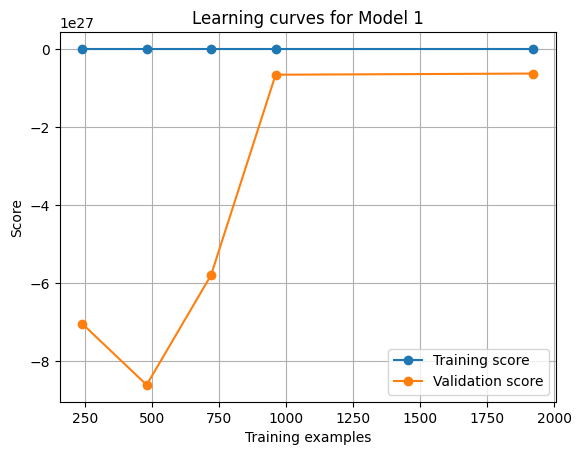

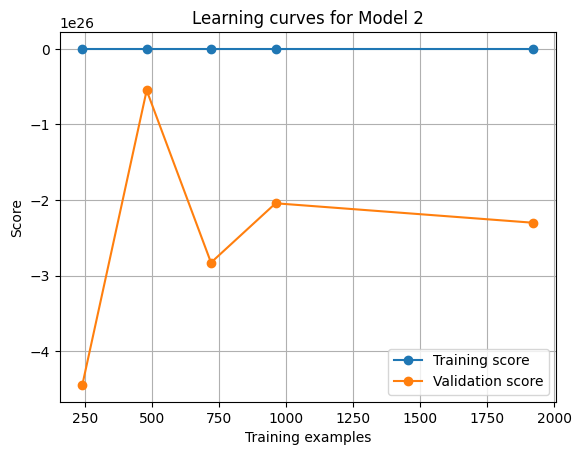

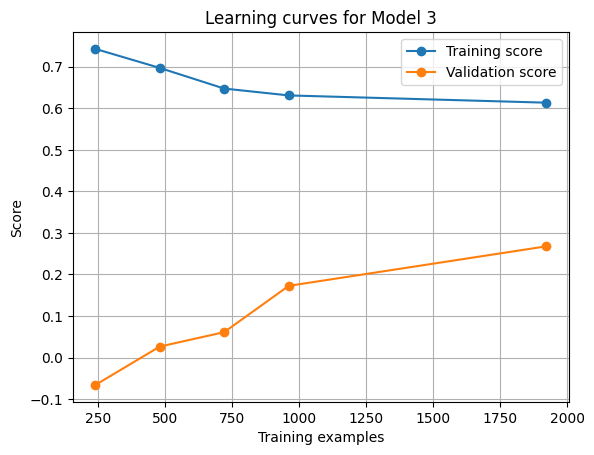

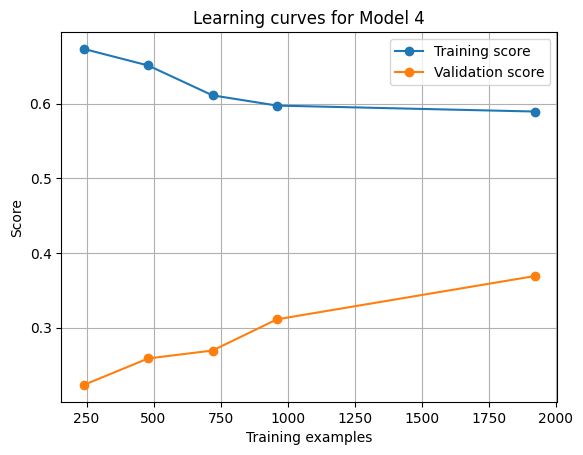

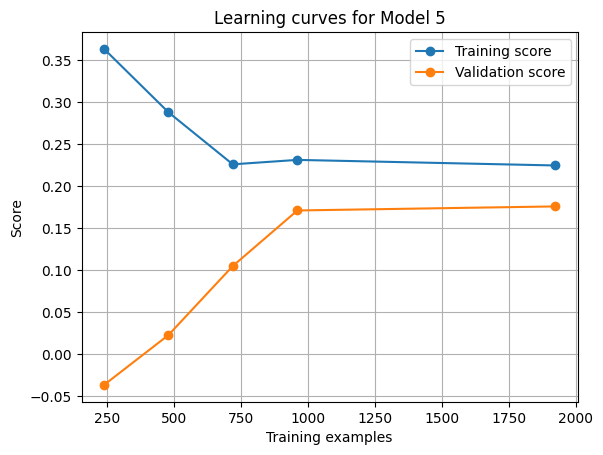

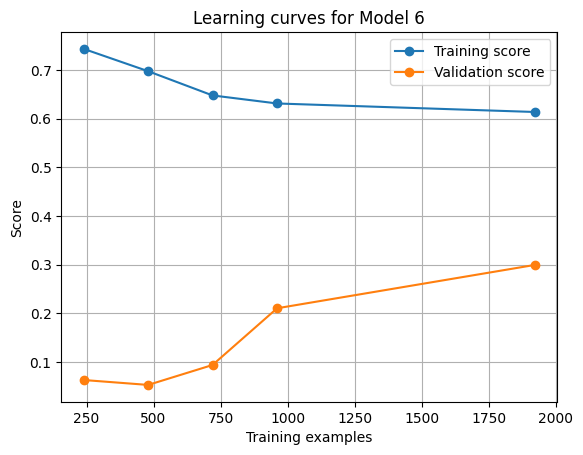

In [118]:
pipes =  [pipe1, pipe2, pipe4, pipe5, pipe6, pipe7]
all_curve(pipes, X_train, y_train)